# Lymphography Data set - Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
### List columns names based on the description
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [3]:
data = pd.read_csv('lymphography.csv',names=col_names)
data

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3,3,2,1,1,2,2,1,2,1,2,2,4,3,5,2,2,2,4
144,2,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1
145,3,2,2,1,1,1,2,1,2,1,3,3,3,3,8,3,2,2,4
146,2,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym.  148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  changes in stru  148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation of   148 non-null    int64
 17  exclusion of no  148 non-null    int64
 18  no. of nod

In [5]:
data.isna().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [6]:
data.describe().style.background_gradient(cmap = 'copper')

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


<AxesSubplot:>

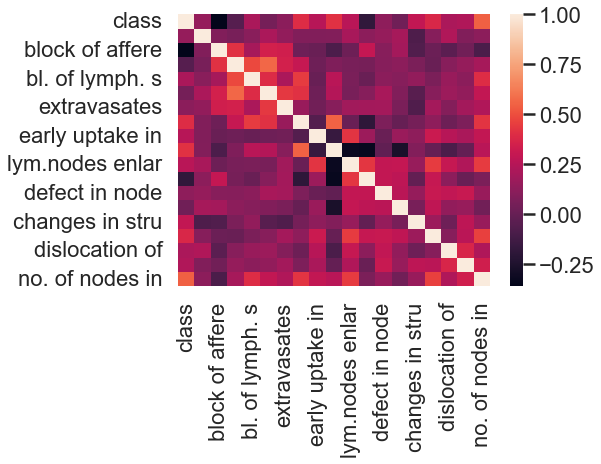

In [7]:
plt.rcParams['figure.figsize']=7,5
sns.heatmap(data.corr())

In [8]:
y=data['class']
x=data.drop('class',axis=1)

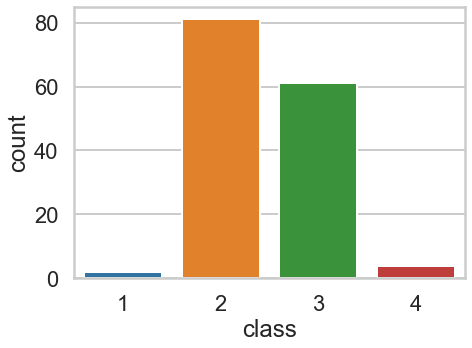

In [9]:
plt.rcParams['figure.figsize']=7,5
sns.countplot(data['class'])
plt.show()

In [10]:
# Imbalanced data to balanced data for class

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
x, y = oversample.fit_resample(x, y)

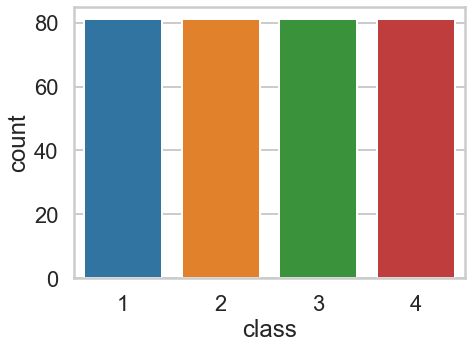

In [11]:
# balanced data
plt.rcParams['figure.figsize']=7,5
sns.countplot(y)
plt.show()

## Neural Network

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
print("size of x_train:{} \n size of x_test:{} \n size of y_train:{}  \n size of y_test:{}".format
            (x_train.shape,x_test.shape,y_train.shape,y_test.shape))

size of x_train:(259, 18) 
 size of x_test:(65, 18) 
 size of y_train:(259,)  
 size of y_test:(65,)


In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
model = keras.Sequential([
    keras.layers.Dense(26, input_dim=x_train.shape[1], activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [16]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2394
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accura

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                494       
                                                                 
 dense_1 (Dense)             (None, 15)                405       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.history.history

{'loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0.23938223719596863,
  0

In [20]:
print(model.evaluate(x_test, y_test))   

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2923
[0.0, 0.29230770468711853]


In [21]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)   

3/3 [==============================] - 0s 3ms/step


In [22]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.29      1.00      0.45        19
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        10

    accuracy                           0.29        65
   macro avg       0.07      0.25      0.11        65
weighted avg       0.09      0.29      0.13        65



<AxesSubplot:>

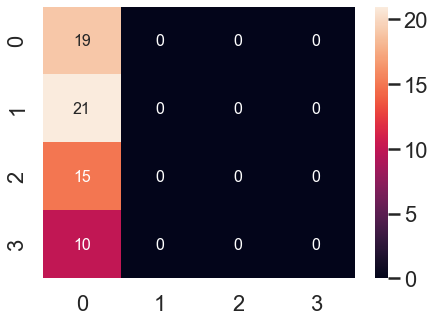

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,annot_kws={"size": 16})

## GridSearchCV 

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# to check parameters of model
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [25]:
parameter = {   'bootstrap'   : [True],
                'max_depth'   : [i for i in range(3,20)],
                'criterion'   : ['entropy'],
                'n_estimators': [i for i in range(3,20)],
                'max_features': ['auto', 'log2']    }

gscv = GridSearchCV(RandomForestClassifier(),parameter,cv=10,n_jobs=-1,verbose=1)

gscv.fit(x_train,y_train)

Fitting 10 folds for each of 578 candidates, totalling 5780 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19]},
             verbose=1)

In [26]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=16)

In [27]:
gscv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 16}

In [28]:
gscv.best_score_

0.9538461538461538

Fitting 10 folds for each of 578 candidates, totalling 5780 fits
Fitting 10 folds for each of 578 candidates, totalling 5780 fits


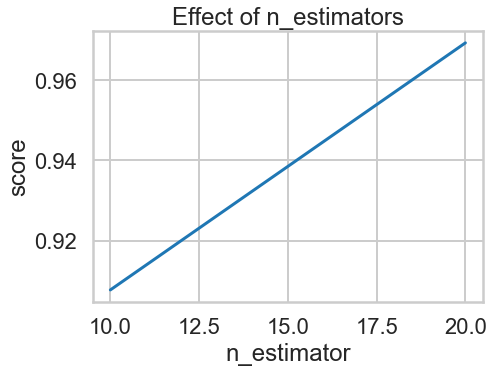

In [31]:
estimators = np.arange(10, 30, 10)
scores = []
for n in estimators:
    RandomForestClassifier().set_params(n_estimators=n)
    gscv.fit(x_train, y_train)
    scores.append(gscv.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [32]:
scores

[0.9076923076923077, 0.9692307692307692]

In [35]:
y_pred_gscv = gscv.predict(x_test)
y_pred_gscv

array([4, 3, 2, 4, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 3, 4, 2, 2, 1, 3,
       1, 1, 2, 1, 1, 4, 2, 2, 1, 4, 2, 1, 3, 4, 2, 2, 2, 3, 2, 1, 1, 3,
       1, 2, 3, 3, 1, 1, 4, 4, 2, 3, 2, 2, 4, 3, 4, 3, 2, 2, 2, 3, 1],
      dtype=int64)

<AxesSubplot:>

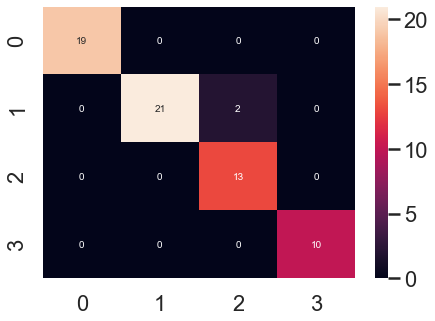

In [39]:
sns.heatmap(confusion_matrix(y_pred_gscv,y_test),annot=True)

## RandomisedSearchCV

Fitting 10 folds for each of 578 candidates, totalling 5780 fits
Fitting 10 folds for each of 578 candidates, totalling 5780 fits


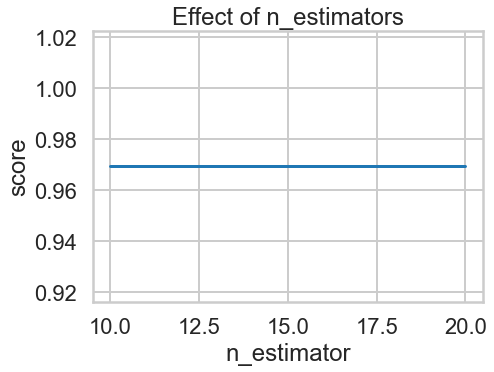

In [34]:
from sklearn.model_selection import RandomizedSearchCV

rncv = GridSearchCV(RandomForestClassifier(),parameter,cv=10,n_jobs=-1,verbose=1)

estimators = np.arange(10, 30, 10)
scores = []
for n in estimators:
    RandomForestClassifier().set_params(n_estimators=n)
    rncv.fit(x_train, y_train)
    scores.append(gscv.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)